#imgnet만 사용

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import tensorflow as tf


# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)


# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [0]:
train_dir = "/content/drive/My Drive/lecture/l_d/p6/art_name_img_2"
validation_dir = "/content/drive/My Drive/lecture/l_d/p6/art_name_img_val_and_test/val"
test_dir = "/content/drive/My Drive/lecture/l_d/p6/art_name_img_val_and_test/test"

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

Using TensorFlow backend.
W0718 06:07:11.200355 140425492551552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 06:07:11.214035 140425492551552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 06:07:11.216583 140425492551552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 06:07:11.241410 140425492551552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0718 06:07:11.545252 1404254

In [0]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 6))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        print(labels_batch)
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

#train_features, train_labels = extract_features(train_dir, 2000)
#validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

#train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
#validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/50
2000/2000 [==============================] - 1s 553us/step - loss: 1.6358 - acc: 0.3285 - val_loss: 1.3407 - val_acc: 0.5370
Epoch 2/50
2000/2000 [==============================] - 1s 320us/step - loss: 1.2571 - acc: 0.5275 - val_loss: 1.1463 - val_acc: 0.5960
Epoch 3/50
2000/2000 [==============================] - 1s 309us/step - loss: 1.0336 - acc: 0.6275 - val_loss: 1.0514 - val_acc: 0.6220
Epoch 4/50
2000/2000 [==============================] - 1s 287us/step - loss: 0.8874 - acc: 0.6900 - val_loss: 0.9872 - val_acc: 0.6560
Epoch 5/50
2000/2000 [==============================] - 1s 304us/step - loss: 0.7341 - acc: 0.7360 - val_loss: 0.9613 - val_acc: 0.6600
Epoch 6/50
2000/2000 [==============================] - 1s 292us/step - loss: 0.6282 - acc: 0.7825 - val_loss: 0.9852 - val_acc: 0.6650
Epoch 7/50
2000/2000 [==============================] - 1s 293us/step - loss: 0.5450 - acc: 0.8140 - val_loss: 0.9297 - val_acc: 0.6780


In [0]:
model.evaluate(test_features, test_labels)
pred = model.predict_classes(test_features)
print(test_features)
print(pred[:10])
test_labels[:10]

1000/1000 [==============================] - 0s 93us/step
[[0.16135722 0.         0.23879379 ... 0.         0.         0.        ]
 [0.31342244 0.         0.         ... 0.         0.66988772 0.        ]
 [0.22243297 0.         0.17330629 ... 0.         0.78486431 0.        ]
 ...
 [0.23786049 0.         0.         ... 0.         0.54677725 0.        ]
 [0.53621626 0.         0.         ... 0.         0.         0.        ]
 [0.05394167 0.         0.         ... 0.14838266 1.04677284 0.        ]]
[4 0 0 1 4 1 4 2 4 0]


array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [0]:
from PIL import Image
 
im = Image.open('/content/drive/My Drive/lecture/l_d/p6/art_name_img_val_and_test/test/Pablo_Picasso/Pablo_Picasso_51.jpg')
 
# Thumbnail 이미지 생성
print(im)
im2 = im.resize((150, 150))
print(im2)
pix = np.array(im2)

pix.shape

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=740x1024 at 0x7FB70164E198>
<PIL.Image.Image image mode=RGB size=150x150 at 0x7FB70164E9B0>


(150, 150, 3)

In [0]:
pred = model.predict_classes(pix)

ValueError: ignored

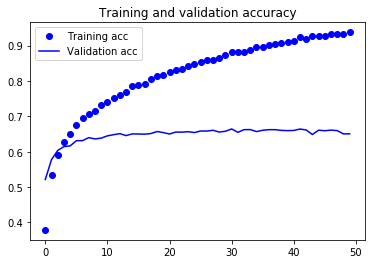

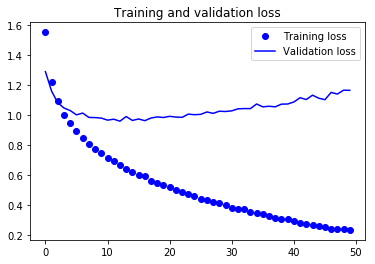

In [0]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=25)ㅌㅌ`

Epoch 1/50


ValueError: ignored

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=90,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )





train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)


SyntaxError: ignored

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8, 8, 512))
    labels = np.zeros(shape=(sample_count, 6))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 4000)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 2000)

train_features = np.reshape(train_features, (4000, 8 * 8 * 512))
validation_features = np.reshape(validation_features, (2000, 8 * 8 * 512))
test_features = np.reshape(test_features, (2000, 8 * 8 * 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(validation_features, validation_labels))

ValueError: ignored

In [0]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# import keras

# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# from keras.optimizers import Adam

# from keras.applications import VGG16

# conv_base = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(100, 100, 3))

# model = Sequential()
# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(6, activation='softmax'))

# adam = Adam()

# model.compile(loss='categorical_crossentropy',
#              optimizer=adam,
#              metrics=['acc'])


# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=300,
#     validation_data=validation_generator,
#     validation_steps=150
# )

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu',
         input_shape=(100, 100, 3)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['acc'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
)

In [0]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#미세조정

In [0]:
train_dir = "/content/drive/My Drive/lecture/l_d/p6/art_name_img_2"
validation_dir = "/content/drive/My Drive/lecture/l_d/p6/art_name_img_val_and_test/val"
test_dir = "/content/drive/My Drive/lecture/l_d/p6/art_name_img_val_and_test/test"

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=90,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
)





train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=30,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=30,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=30,
    class_mode='categorical'
)


Using TensorFlow backend.


Found 900 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [41]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 4s 0us/step


In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 16,813,638
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [6]:
from keras import optimizers


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=10)

W0719 02:04:33.424382 139754611603328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 02:04:33.550541 139754611603328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
30/30 [==============================] - 363s 12s/step - loss: 1.6725 - acc: 0.3200 - val_loss: 1.5440 - val_acc: 0.4267
Epoch 2/20
30/30 [==============================] - 25s 835ms/step - loss: 1.2517 - acc: 0.5811 - val_loss: 1.3070 - val_acc: 0.5167
Epoch 3/20
30/30 [==============================] - 25s 846ms/step - loss: 0.9613 - acc: 0.7033 - val_loss: 1.1528 - val_acc: 0.5800
Epoch 4/20
30/30 [==============================] - 25s 845ms/step - loss: 0.7504 - acc: 0.7856 - val_loss: 1.0363 - val_acc: 0.6067
Epoch 5/20
30/30 [==============================] - 25s 842ms/step - loss: 0.5902 - acc: 0.8400 - val_loss: 0.9735 - val_acc: 0.6267
Epoch 6/20
30/30 [==============================] - 25s 845ms/step - loss: 0.4677 - acc: 0.8778 - val_loss: 0.9245 - val_acc: 0.6500
Epoch 7/20
30/30 [==============================] - 25s 845ms/step - loss: 0.3690 - acc: 0.9189 - val_loss: 0.9114 - val_acc: 0.6633
Epoch 8/20
30/30 [==============================] - 26s 853ms/step - l

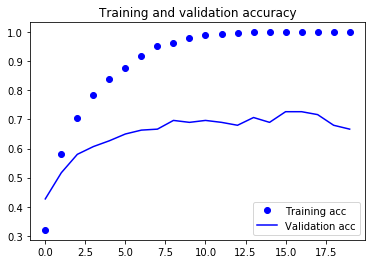

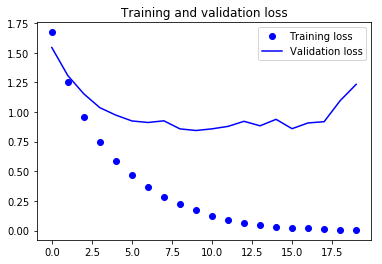

In [9]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu',
         input_shape=(150, 150, 3)))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=60,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=24
)



W0719 02:28:26.260029 139754611603328 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch 1/20
60/60 [==============================] - 60s 996ms/step - loss: 1.9313 - acc: 0.2806 - val_loss: 1.7112 - val_acc: 0.4042
Epoch 2/20
60/60 [==============================] - 52s 872ms/step - loss: 1.5102 - acc: 0.3817 - val_loss: 1.6314 - val_acc: 0.4208
Epoch 3/20
60/60 [==============================] - 52s 868ms/step - loss: 1.4276 - acc: 0.4250 - val_loss: 1.6141 - val_acc: 0.4361
Epoch 4/20
60/60 [==============================] - 53s 877ms/step - loss: 1.2176 - acc: 0.5361 - val_loss: 1.5686 - val_acc: 0.3903
Epoch 5/20
60/60 [==============================] - 52s 869ms/step - loss: 1.0454 - acc: 0.6128 - val_loss: 1.5384 - val_acc: 0.3569
Epoch 6/20
60/60 [==============================] - 52s 864ms/step - loss: 0.8487 - acc: 0.7117 - val_loss: 1.4845 - val_acc: 0.4083
Epoch 7/20
60/60 [==============================] - 52s 860ms/step - loss: 0.7042 - acc: 0.7600 - val_loss: 1.5825 - val_acc: 0.3444
Epoch 8/20
60/60 [==============================] - 52s 874ms/step - 

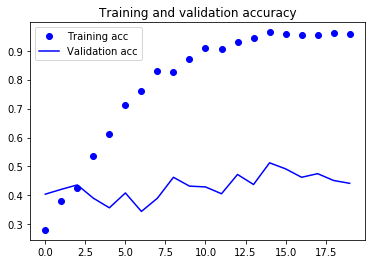

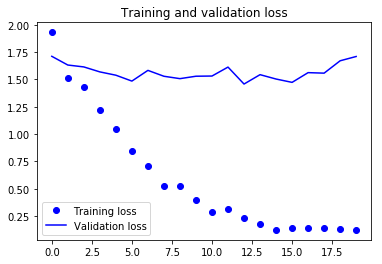

In [12]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#흑백

In [0]:
# import keras


# def VGG16_2(include_top=False,
#           weights='imagenet',
#           input_tensor=None,
#           input_shape=None,
#           pooling=None,
#           classes=6,
#           **kwargs):
#     """Instantiates the VGG16 architecture.
#     Optionally loads weights pre-trained on ImageNet.
#     Note that the data format convention used by the model is
#     the one specified in your Keras config at `~/.keras/keras.json`.
#     # Arguments
#         include_top: whether to include the 3 fully-connected
#             layers at the top of the network.
#         weights: one of `None` (random initialization),
#               'imagenet' (pre-training on ImageNet),
#               or the path to the weights file to be loaded.
#         input_tensor: optional Keras tensor
#             (i.e. output of `layers.Input()`)
#             to use as image input for the model.
#         input_shape: optional shape tuple, only to be specified
#             if `include_top` is False (otherwise the input shape
#             has to be `(224, 224, 3)`
#             (with `channels_last` data format)
#             or `(3, 224, 224)` (with `channels_first` data format).
#             It should have exactly 3 input channels,
#             and width and height should be no smaller than 32.
#             E.g. `(200, 200, 3)` would be one valid value.
#         pooling: Optional pooling mode for feature extraction
#             when `include_top` is `False`.
#             - `None` means that the output of the model will be
#                 the 4D tensor output of the
#                 last convolutional block.
#             - `avg` means that global average pooling
#                 will be applied to the output of the
#                 last convolutional block, and thus
#                 the output of the model will be a 2D tensor.
#             - `max` means that global max pooling will
#                 be applied.
#         classes: optional number of classes to classify images
#             into, only to be specified if `include_top` is True, and
#             if no `weights` argument is specified.
#     # Returns
#         A Keras model instance.
#     # Raises
#         ValueError: in case of invalid argument for `weights`,
#             or invalid input shape.
#     """
# #     backend, layers, models, keras_utils = get_submodules_from_kwargs(kwargs)

# #     if not (weights in {'imagenet', None} or os.path.exists(weights)):
# #         raise ValueError('The `weights` argument should be either '
# #                          '`None` (random initialization), `imagenet` '
# #                          '(pre-training on ImageNet), '
# #                          'or the path to the weights file to be loaded.')

# #     if weights == 'imagenet' and include_top and classes != 6:
# #         raise ValueError('If using `weights` as `"imagenet"` with `include_top`'
# #                          ' as true, `classes` should be 1000')
#     # Determine proper input shape
# #     input_shape = _obtain_input_shape(input_shape,
# #                                       default_size=150,
# #                                       min_size=32,
# #                                       data_format=backend.image_data_format(),
# #                                       require_flatten=include_top,
# #                                       weights=weights)

#     if input_tensor is None:
#         img_input = layers.Input(shape=input_shape)
#     else:
#         if not backend.is_keras_tensor(input_tensor):
#             img_input = layers.Input(tensor=input_tensor, shape=input_shape)
#         else:
#             img_input = input_tensor
# #     Block 1
#     x = layers.Conv2D(64, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block1_conv1')(img_input)
#     x = layers.Conv2D(64, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block1_conv2')(x)
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

#     # Block 2
#     x = layers.Conv2D(128, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block2_conv1')(x)
#     x = layers.Conv2D(128, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block2_conv2')(x)
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

#     # Block 3
#     x = layers.Conv2D(256, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block3_conv1')(x)
#     x = layers.Conv2D(256, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block3_conv2')(x)
#     x = layers.Conv2D(256, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block3_conv3')(x)
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

#     # Block 4
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block4_conv1')(x)
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block4_conv2')(x)
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block4_conv3')(x)
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

#     # Block 5
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block5_conv1')(x)
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block5_conv2')(x)
#     x = layers.Conv2D(512, (3, 3),
#                       activation='relu',
#                       padding='same',
#                       name='block5_conv3')(x)
#     x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# #     if include_top:
# #         # Classification block
# #         x = layers.Flatten(name='flatten')(x)
# #         x = layers.Dense(4096, activation='relu', name='fc1')(x)
# #         x = layers.Dense(4096, activation='relu', name='fc2')(x)
# #         x = layers.Dense(classes, activation='softmax', name='predictions')(x)
# #     else:
# #         if pooling == 'avg':
# #             x = layers.GlobalAveragePooling2D()(x)
# #         elif pooling == 'max':
# #             x = layers.GlobalMaxPooling2D()(x)

# #     # Ensure that the model takes into account
# #     # any potential predecessors of `input_tensor`.
#     if input_tensor is not None:
#         inputs = keras_utils.get_source_inputs(input_tensor)
#     else:
#         inputs = img_input
# #     Create model.
#     model = models.Model(inputs, x, name='vgg16')

#     # Load weights.
#     if weights == 'imagenet':
#         if include_top:
#             weights_path = keras.utils.get_file(
#                 'vgg16_weights_tf_dim_ordering_tf_kernels.h5',
#                 WEIGHTS_PATH,
#                 cache_subdir='models',
#                 file_hash='64373286793e3c8b2b4e3219cbf3544b')
#         else:
#             weights_path = keras.utils.get_file(
#                 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
#                 WEIGHTS_PATH_NO_TOP,
#                 cache_subdir='models',
#                 file_hash='6d6bbae143d832006294945121d1f1fc')
#         model.load_weights(weights_path)
#         if backend.backend() == 'theano':
#             keras_utils.convert_all_kernels_in_model(model)
#     elif weights is not None:
#         model.load_weights(weights)

#     return model

In [0]:
train_dir = "/content/drive/My Drive/lecture/l_d/p6/art_name_img_2"
validation_dir = "/content/drive/My Drive/lecture/l_d/p6/art_name_img_val_and_test/val"
test_dir = "/content/drive/My Drive/lecture/l_d/p6/art_name_img_val_and_test/test"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=90,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )





train_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=30,
   color_mode='grayscale',
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=30,
   color_mode='grayscale',
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=30,
   color_mode='grayscale',
    class_mode='categorical'
)

Found 900 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import ZeroPadding2D, BatchNormalization

from tensorflow.keras import regularizers


weight_decay = 1e-4

model = Sequential()

model.add(ZeroPadding2D((1, 1), input_shape=(150, 150, 1)))
model.add(Conv2D(32, (3, 3), activation='elu',padding='same',
                kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(32, (3, 3), activation='elu', padding='same',
                kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), activation='elu', padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), activation='elu', padding='same',
                kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), activation='elu', padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), activation='elu', padding='same',
                kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation='elu', padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation='elu', padding='same',
                kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation='elu', padding='same',
                kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='elu', padding='same',
#                  kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(BatchNormalization())
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='elu', padding='same',
#                 kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(BatchNormalization())
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='elu', padding='same',
#                 kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))


# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same',
#          ))
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_11 (ZeroPaddi (None, 152, 152, 1)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 152, 152, 32)      320       
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 154, 154, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 154, 154, 32)      9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 77, 77, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 77, 77, 32)        128       
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 79, 79, 32)       

In [47]:
from tensorflow.keras.callbacks import LearningRateScheduler


def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 10:
        lrate = 0.0005
    if epoch > 20:
        lrate = 0.0003
    return lrate



adam = Adam(lr=1e-3)
rms = RMSprop(lr=1e-4)
sgd = SGD(learning_rate=1e-3, momentum=0.9)


model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=10,
#    callbacks=[LearningRateScheduler(lr_schedule)]
)


Epoch 1/40
30/30 [==============================] - 38s 1s/step - loss: 1.8308 - acc: 0.1656 - val_loss: 37.9295 - val_acc: 0.1667
Epoch 2/40
30/30 [==============================] - 28s 937ms/step - loss: 1.8547 - acc: 0.1544 - val_loss: 3.4946 - val_acc: 0.1700
Epoch 3/40
30/30 [==============================] - 28s 928ms/step - loss: 1.8936 - acc: 0.1544 - val_loss: 71.2054 - val_acc: 0.1833
Epoch 4/40
30/30 [==============================] - 28s 938ms/step - loss: 1.8351 - acc: 0.1544 - val_loss: 11.4731 - val_acc: 0.1833
Epoch 5/40
30/30 [==============================] - 28s 932ms/step - loss: 1.8335 - acc: 0.1522 - val_loss: 2.3216 - val_acc: 0.1733
Epoch 6/40
30/30 [==============================] - 28s 929ms/step - loss: 1.8315 - acc: 0.1667 - val_loss: 1.8303 - val_acc: 0.1667
Epoch 7/40
30/30 [==============================] - 28s 933ms/step - loss: 1.8294 - acc: 0.1667 - val_loss: 1.8282 - val_acc: 0.1667
Epoch 8/40
30/30 [==============================] - 28s 940ms/step - 

KeyboardInterrupt: ignored

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import ZeroPadding2D, BatchNormalization

from tensorflow.keras import regularizers


#weight_decay = 1e-4

model = Sequential()

#model.add(ZeroPadding2D((1, 1), input_shape=(150, 150, 1)))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',
                 input_shape=(150, 150, 1)
#                kernel_regularizer=regularizers.l2(weight_decay)
                ))
#model.add(BatchNormalization())
#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
#                kernel_regularizer=regularizers.l2(weight_decay)
                ))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
#                 kernel_regularizer=regularizers.l2(weight_decay)
                ))
#model.add(BatchNormalization())
#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
#                kernel_regularizer=regularizers.l2(weight_decay)
                ))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))


#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same',
#                 kernel_regularizer=regularizers.l2(weight_decay)
                ))
#model.add(BatchNormalization())
#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same',
#                kernel_regularizer=regularizers.l2(weight_decay)
                ))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))


#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',
#                 kernel_regularizer=regularizers.l2(weight_decay)
                ))
#model.add(BatchNormalization())
#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',
#                kernel_regularizer=regularizers.l2(weight_decay)
                ))
#model.add(BatchNormalization())
#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',
#                kernel_regularizer=regularizers.l2(weight_decay)
                ))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))


# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='elu', padding='same',
#                  kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(BatchNormalization())
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='elu', padding='same',
#                 kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(BatchNormalization())
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='elu', padding='same',
#                 kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))


# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same',
#          ))
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

W0719 09:34:11.537366 140063034115968 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.optimizers import Adam, RMSprop, SGD



def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 10:
        lrate = 0.0005
    if epoch > 20:
        lrate = 0.0003
    return lrate



adam = Adam(lr=1e-3)
rms = RMSprop(lr=1e-4)
sgd = SGD(learning_rate=1e-3, momentum=0.9)


model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=10,
#    callbacks=[LearningRateScheduler(lr_schedule)]
)


Epoch 1/40
30/30 [==============================] - 630s 21s/step - loss: 1.8206 - acc: 0.1633 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 2/40
30/30 [==============================] - 27s 896ms/step - loss: 1.7922 - acc: 0.1422 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 3/40
30/30 [==============================] - 27s 907ms/step - loss: 1.7919 - acc: 0.1467 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 4/40
30/30 [==============================] - 28s 918ms/step - loss: 1.7920 - acc: 0.1456 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 5/40
30/30 [==============================] - 27s 906ms/step - loss: 1.7920 - acc: 0.1511 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 6/40
30/30 [==============================] - 27s 915ms/step - loss: 1.7919 - acc: 0.1611 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 7/40
30/30 [==============================] - 27s 896ms/step - loss: 1.7919 - acc: 0.1500 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 8/40
30/30 [==============================] - 28s 923ms/step - l

KeyboardInterrupt: ignored

In [0]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization


weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(150, 150, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

In [40]:
from tensorflow.keras.callbacks import LearningRateScheduler


def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 10:
        lrate = 0.0005
    if epoch > 20:
        lrate = 0.0003
    return lrate



adam = Adam(lr=1e-2)
rms = RMSprop(lr=1e-4)
sgd = SGD(learning_rate=1e-3, momentum=0.9)


model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=10,
    callbacks=[LearningRateScheduler(lr_schedule)]
)



Epoch 1/40
30/30 [==============================] - 32s 1s/step - loss: 11.2100 - acc: 0.2689 - val_loss: 76.4689 - val_acc: 0.1933
Epoch 2/40
30/30 [==============================] - 27s 911ms/step - loss: 6.4345 - acc: 0.3711 - val_loss: 15.9703 - val_acc: 0.1967
Epoch 3/40
30/30 [==============================] - 27s 889ms/step - loss: 4.4961 - acc: 0.4533 - val_loss: 10.7731 - val_acc: 0.2867
Epoch 4/40
30/30 [==============================] - 27s 895ms/step - loss: 5.2400 - acc: 0.4233 - val_loss: 12.2690 - val_acc: 0.1733
Epoch 5/40
30/30 [==============================] - 27s 903ms/step - loss: 4.0515 - acc: 0.5067 - val_loss: 7.9443 - val_acc: 0.2433
Epoch 6/40
30/30 [==============================] - 27s 900ms/step - loss: 3.2772 - acc: 0.5600 - val_loss: 11.9741 - val_acc: 0.2500
Epoch 7/40
30/30 [==============================] - 27s 905ms/step - loss: 2.7372 - acc: 0.5856 - val_loss: 5.4095 - val_acc: 0.1733
Epoch 8/40
30/30 [==============================] - 27s 890ms/step

KeyboardInterrupt: ignored

In [0]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [19]:




adam = Adam(lr=1e-3)
rms = RMSprop(lr=1e-4)
sgd = SGD(learning_rate=1e-3, momentum=0.9)


model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=10
)



Epoch 1/40
30/30 [==============================] - 36s 1s/step - loss: 2.8631 - acc: 0.1644 - val_loss: 1.7905 - val_acc: 0.1667
Epoch 2/40
30/30 [==============================] - 27s 891ms/step - loss: 1.7792 - acc: 0.1922 - val_loss: 1.7607 - val_acc: 0.1700
Epoch 3/40
30/30 [==============================] - 26s 879ms/step - loss: 1.7294 - acc: 0.2367 - val_loss: 1.7016 - val_acc: 0.2667
Epoch 4/40
30/30 [==============================] - 27s 891ms/step - loss: 1.7335 - acc: 0.2689 - val_loss: 1.7129 - val_acc: 0.2167
Epoch 5/40
30/30 [==============================] - 27s 896ms/step - loss: 1.6823 - acc: 0.2967 - val_loss: 1.6700 - val_acc: 0.2700
Epoch 6/40
30/30 [==============================] - 27s 887ms/step - loss: 1.6488 - acc: 0.3000 - val_loss: 1.6518 - val_acc: 0.2900
Epoch 7/40
30/30 [==============================] - 27s 892ms/step - loss: 1.6832 - acc: 0.2789 - val_loss: 1.6736 - val_acc: 0.3200
Epoch 8/40
30/30 [==============================] - 27s 888ms/step - los

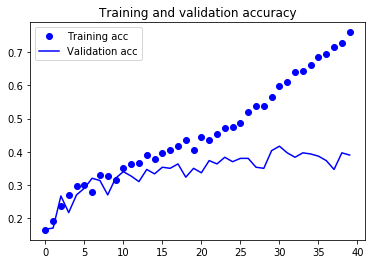

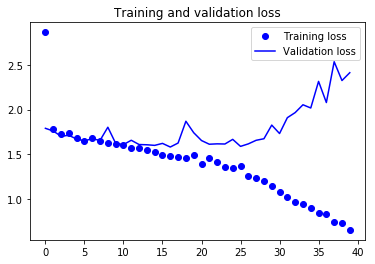

In [20]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu',
         input_shape=(256, 256, 3)))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=60,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=24
)



W0719 07:20:59.589539 139972882888576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 07:20:59.617780 139972882888576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0719 07:20:59.758358 139972882888576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
60/60 [==============================] - 389s 6s/step - loss: 13.2824 - acc: 0.1633 - val_loss: 13.3646 - val_acc: 0.1708
Epoch 2/20
12/60 [=====>........................] - ETA: 22s - loss: 13.4317 - acc: 0.1667

KeyboardInterrupt: ignored

In [52]:
from keras.applications import VGG16

from keras import models
from keras import layers
from keras import optimizers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))


conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
        



model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/20
30/30 [==============================] - 12s 386ms/step - loss: 1.6545 - acc: 0.3033 - val_loss: 1.4308 - val_acc: 0.4800
Epoch 2/20
30/30 [==============================] - 7s 234ms/step - loss: 1.3488 - acc: 0.5333 - val_loss: 1.2940 - val_acc: 0.5200
Epoch 3/20
30/30 [==============================] - 7s 242ms/step - loss: 0.9993 - acc: 0.6767 - val_loss: 1.1286 - val_acc: 0.5600
Epoch 4/20
30/30 [==============================] - 7s 245ms/step - loss: 0.7806 - acc: 0.7633 - val_loss: 0.9016 - val_acc: 0.6200
Epoch 5/20
30/30 [==============================] - 8s 251ms/step - loss: 0.8189 - acc: 0.7300 - val_loss: 0.9281 - val_acc: 0.6400
Epoch 6/20
30/30 [==============================] - 7s 243ms/step - loss: 0.6504 - acc: 0.7867 - val_loss: 0.9537 - val_acc: 0.6500
Epoch 7/20
30/30 [==============================] - 8s 255ms/step - loss: 0.5050 - acc: 0.8600 - val_loss: 0.8107 - val_acc: 0.6900
Epoch 8/20
30/30 [==============================] - 7s 246ms/step - loss: 0

In [0]:
from keras.optimizers import Adam


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)

In [59]:
from keras.optimizers import Adam

adam = Adam(lr= 1e-2)


model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/20
30/30 [==============================] - 37s 1s/step - loss: 1.8005 - acc: 0.1600 - val_loss: 1.7917 - val_acc: 0.1467
Epoch 2/20
30/30 [==============================] - 31s 1s/step - loss: 1.7982 - acc: 0.1622 - val_loss: 1.7891 - val_acc: 0.1667
Epoch 3/20
30/30 [==============================] - 31s 1s/step - loss: 1.7962 - acc: 0.1622 - val_loss: 1.7935 - val_acc: 0.1567
Epoch 4/20
30/30 [==============================] - 31s 1s/step - loss: 1.7925 - acc: 0.1578 - val_loss: 1.7920 - val_acc: 0.1667
Epoch 5/20
30/30 [==============================] - 31s 1s/step - loss: 1.7957 - acc: 0.1400 - val_loss: 1.7923 - val_acc: 0.1800
Epoch 6/20
30/30 [==============================] - 30s 1s/step - loss: 1.7960 - acc: 0.1644 - val_loss: 1.7961 - val_acc: 0.1367
Epoch 7/20
30/30 [==============================] - 31s 1s/step - loss: 1.7956 - acc: 0.1522 - val_loss: 1.7939 - val_acc: 0.1533
Epoch 8/20
30/30 [==============================] - 31s 1s/step - loss: 1.7934 - acc: 0.16

In [60]:
adam = Adam(lr= 1e-3)


model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/20
30/30 [==============================] - 37s 1s/step - loss: 1.7921 - acc: 0.1544 - val_loss: 1.7918 - val_acc: 0.1700
Epoch 2/20
30/30 [==============================] - 31s 1s/step - loss: 1.7919 - acc: 0.1500 - val_loss: 1.7923 - val_acc: 0.1500
Epoch 3/20
30/30 [==============================] - 31s 1s/step - loss: 1.7919 - acc: 0.1611 - val_loss: 1.7912 - val_acc: 0.1733
Epoch 4/20
30/30 [==============================] - 31s 1s/step - loss: 1.7920 - acc: 0.1500 - val_loss: 1.7920 - val_acc: 0.1667
Epoch 5/20
30/30 [==============================] - 31s 1s/step - loss: 1.7918 - acc: 0.1711 - val_loss: 1.7918 - val_acc: 0.1533
Epoch 6/20
30/30 [==============================] - 31s 1s/step - loss: 1.7919 - acc: 0.1656 - val_loss: 1.7920 - val_acc: 0.1633
Epoch 7/20
30/30 [==============================] - 31s 1s/step - loss: 1.7920 - acc: 0.1633 - val_loss: 1.7916 - val_acc: 0.1633
Epoch 8/20
30/30 [==============================] - 31s 1s/step - loss: 1.7919 - acc: 0.15

In [61]:
adam = Adam(lr= 1e-4)


model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/20
30/30 [==============================] - 38s 1s/step - loss: 1.7918 - acc: 0.1611 - val_loss: 1.7919 - val_acc: 0.1533
Epoch 2/20
30/30 [==============================] - 30s 991ms/step - loss: 1.7918 - acc: 0.1689 - val_loss: 1.7918 - val_acc: 0.1467
Epoch 3/20
30/30 [==============================] - 31s 1s/step - loss: 1.7918 - acc: 0.1633 - val_loss: 1.7916 - val_acc: 0.1867
Epoch 4/20
30/30 [==============================] - 31s 1s/step - loss: 1.7917 - acc: 0.1711 - val_loss: 1.7919 - val_acc: 0.1633
Epoch 5/20
30/30 [==============================] - 31s 1s/step - loss: 1.7919 - acc: 0.1611 - val_loss: 1.7918 - val_acc: 0.1633
Epoch 6/20
30/30 [==============================] - 31s 1s/step - loss: 1.7917 - acc: 0.1722 - val_loss: 1.7918 - val_acc: 0.1533
Epoch 7/20
30/30 [==============================] - 31s 1s/step - loss: 1.7918 - acc: 0.1656 - val_loss: 1.7915 - val_acc: 0.1900
Epoch 8/20
30/30 [==============================] - 31s 1s/step - loss: 1.7918 - acc: 0

In [62]:
adam = Adam(lr= 1e-5)


model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/20
30/30 [==============================] - 37s 1s/step - loss: 1.7918 - acc: 0.1744 - val_loss: 1.7919 - val_acc: 0.1667
Epoch 2/20
30/30 [==============================] - 30s 987ms/step - loss: 1.7918 - acc: 0.1644 - val_loss: 1.7916 - val_acc: 0.1767
Epoch 3/20
30/30 [==============================] - 31s 1s/step - loss: 1.7917 - acc: 0.1711 - val_loss: 1.7919 - val_acc: 0.1700
Epoch 4/20
30/30 [==============================] - 31s 1s/step - loss: 1.7918 - acc: 0.1544 - val_loss: 1.7919 - val_acc: 0.1433
Epoch 5/20
30/30 [==============================] - 31s 1s/step - loss: 1.7918 - acc: 0.1678 - val_loss: 1.7917 - val_acc: 0.1867
Epoch 6/20
30/30 [==============================] - 30s 1s/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7917 - val_acc: 0.1633
Epoch 7/20
30/30 [==============================] - 31s 1s/step - loss: 1.7918 - acc: 0.1633 - val_loss: 1.7919 - val_acc: 0.1600
Epoch 8/20
30/30 [==============================] - 30s 1s/step - loss: 1.7917 - acc: 0

KeyboardInterrupt: ignored

#컨브넷 시각화

In [14]:
import keras
keras.__version__

'2.2.4'

In [19]:
base_dir = '/content/drive/My Drive/lecture/l_d/p6/'


img_path = base_dir + 'art_name_img/Pablo_Picasso/Pablo_Picasso_292.jpg'
# 이미지를 4D 텐서로 변경합니다
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# 모델이 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용합니다
img_tensor /= 255.

# 이미지 텐서의 크기는 (1, 150, 150, 3)입니다
print(img_tensor.shape)

(1, 150, 150, 3)


In [0]:

import matplotlib.pyplot as plt

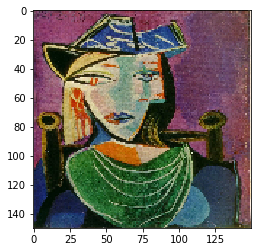

In [21]:

plt.imshow(img_tensor[0])
plt.show()

In [0]:
from keras import models

# 상위 8개 층의 출력을 추출합니다:
layer_outputs = [layer.output for layer in model.layers[:8]]
# 입력에 대해 8개 층의 출력을 반환하는 모델을 만듭니다:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
# 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트를 반환합니다:
activations = activation_model.predict(img_tensor)

In [24]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 146, 146, 32)


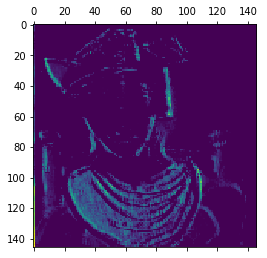

In [25]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

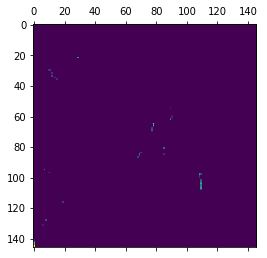

In [26]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


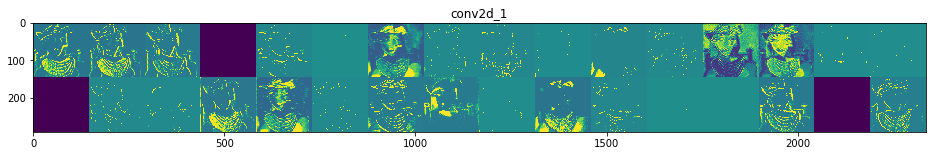

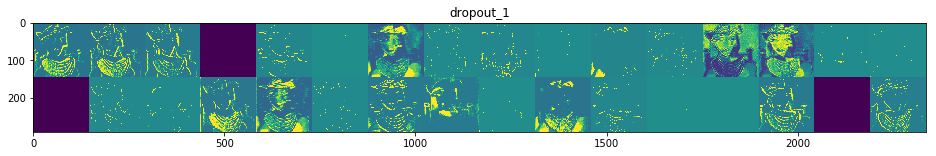

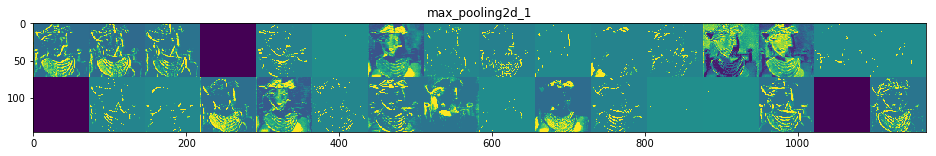

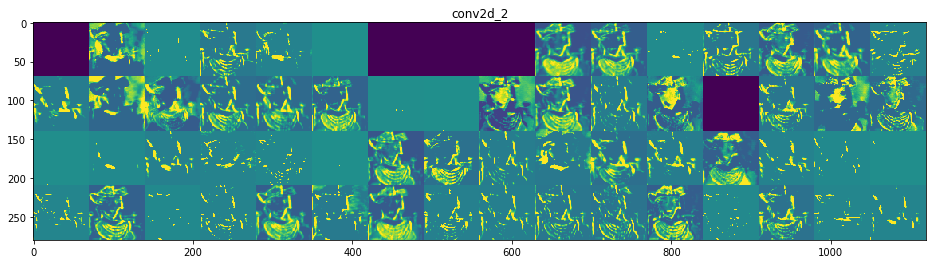

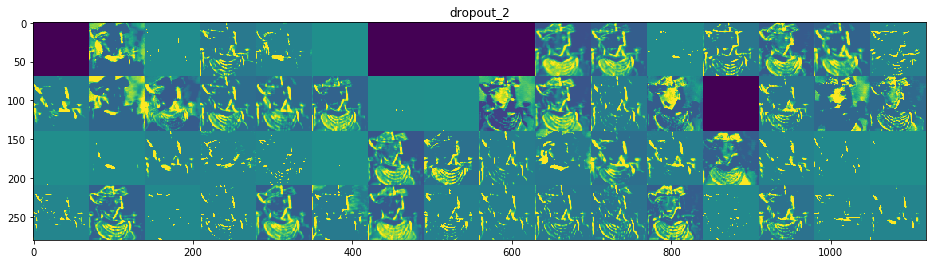

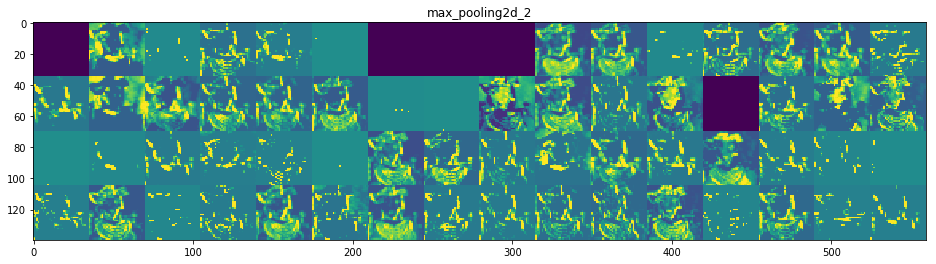

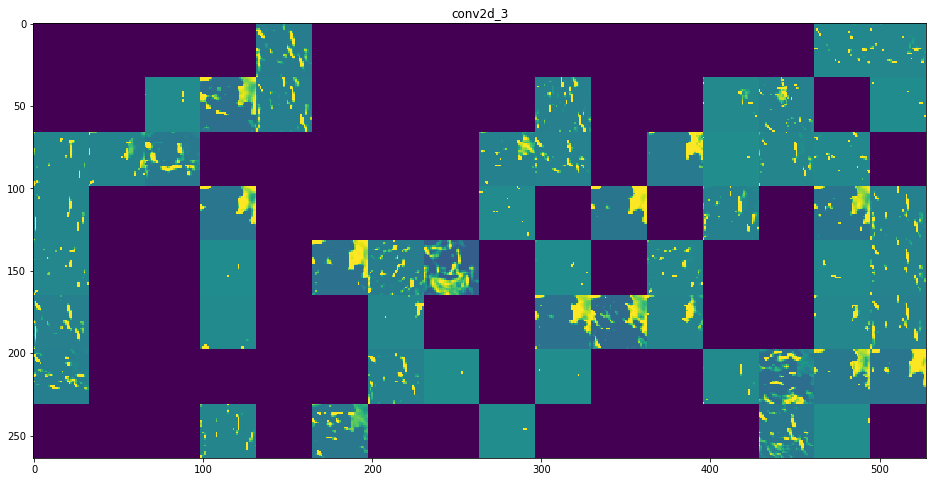

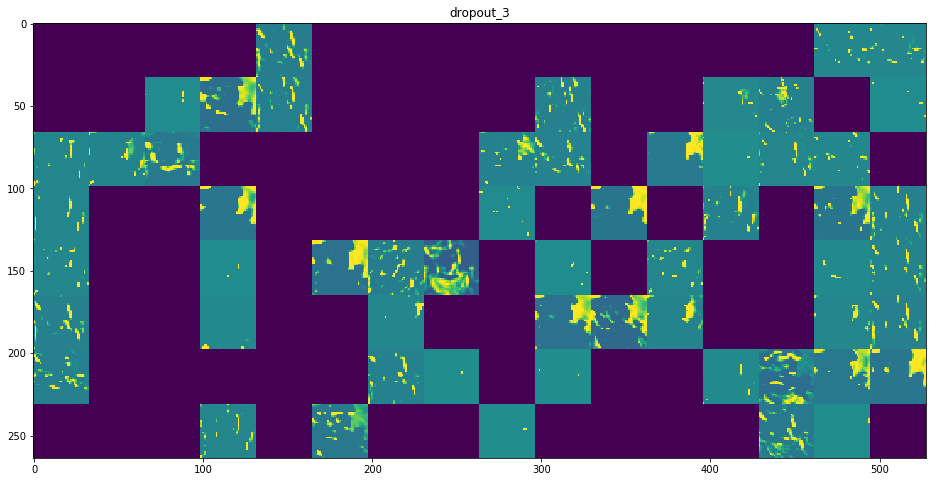

In [27]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그립니다
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기는 (1, size, size, n_features)입니다
    size = layer_activation.shape[1]

    # 활성화 채널을 위한 그리드 크기를 구합니다
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

In [0]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [0]:
# gradients 함수가 반환하는 텐서 리스트(여기에서는 크기가 1인 리스트)에서 첫 번째 텐서를 추출합니다
grads = K.gradients(loss, model.input)[0]

In [0]:

# 0 나눗셈을 방지하기 위해 1e–5을 더합니다
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [0]:
iterate = K.function([model.input], [loss, grads])

# 테스트:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [0]:
# 잡음이 섞인 회색 이미지로 시작합니다
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# 업데이트할 그래디언트의 크기
step = 1.
for i in range(40):   # 경사 상승법을 40회 실행합니다
    # 손실과 그래디언트를 계산합니다
    loss_value, grads_value = iterate([input_img_data])
    # 손실을 최대화하는 방향으로 입력 이미지를 수정합니다
    input_img_data += grads_value * step

In [0]:
def deprocess_image(x):
    # 텐서의 평균이 0, 표준 편차가 0.1이 되도록 정규화합니다
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # [0, 1]로 클리핑합니다
    x += 0.5
    x = np.clip(x, 0, 1)

    # RGB 배열로 변환합니다
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
    # 주어진 층과 필터의 활성화를 최대화하기 위한 손실 함수를 정의합니다
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # 손실에 대한 입력 이미지의 그래디언트를 계산합니다
    grads = K.gradients(loss, model.input)[0]

    # 그래디언트 정규화
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # 입력 이미지에 대한 손실과 그래디언트를 반환합니다
    iterate = K.function([model.input], [loss, grads])
    
    # 잡음이 섞인 회색 이미지로 시작합니다
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # 경사 상승법을 40 단계 실행합니다
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

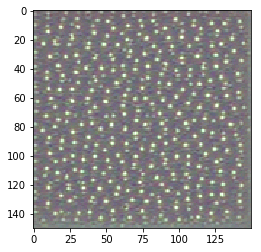

In [35]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

In [36]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # 결과를 담을 빈 (검은) 이미지
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

    for i in range(8):  # results 그리드의 행을 반복합니다
        for j in range(8):  # results 그리드의 열을 반복합니다
            # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴 생성합니다
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # results 그리드의 (i, j) 번째 위치에 저장합니다
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # results 그리드를 그립니다
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.